In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("/Users/andruha/mlops-course-project/data/processed/air_quality.csv")

df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0


In [3]:
# Общая инфа по типам данных и количеству не-NaN
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    6236 non-null   float64
 1   PM10     6236 non-null   float64
 2   NO       6236 non-null   float64
 3   NO2      6236 non-null   float64
 4   NOx      6236 non-null   float64
 5   NH3      6236 non-null   float64
 6   CO       6236 non-null   float64
 7   SO2      6236 non-null   float64
 8   O3       6236 non-null   float64
 9   Benzene  6236 non-null   float64
 10  Toluene  6236 non-null   float64
 11  Xylene   6236 non-null   float64
 12  AQI      6236 non-null   float64
dtypes: float64(13)
memory usage: 633.5 KB


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103
std,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826
min,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000


In [8]:
# Количество пропусков по каждому столбцу
df.isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [10]:
target_col = "PM2.5"

df[target_col].describe()


count    6236.000000
mean       61.327365
std        53.709682
min         2.000000
25%        27.927500
50%        47.490000
75%        73.442500
max       639.190000
Name: PM2.5, dtype: float64

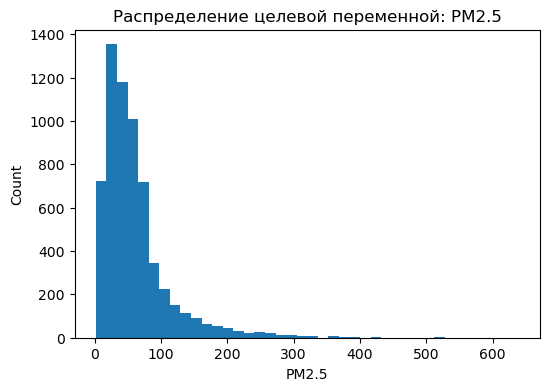

In [11]:
plt.figure(figsize=(6, 4))
plt.hist(df[target_col], bins=40)
plt.xlabel(target_col)
plt.ylabel("Count")
plt.title(f"Распределение целевой переменной: {target_col}")
plt.show()


In [12]:
numeric_cols = df.select_dtypes(include="number").columns
corr = df[numeric_cols].corr()

corr[target_col].sort_values(ascending=False)


PM2.5      1.000000
AQI        0.924028
PM10       0.895543
NOx        0.618705
NO         0.604239
NH3        0.582025
NO2        0.559055
Toluene    0.475935
CO         0.422486
O3         0.293691
SO2        0.249567
Benzene    0.203572
Xylene     0.068741
Name: PM2.5, dtype: float64

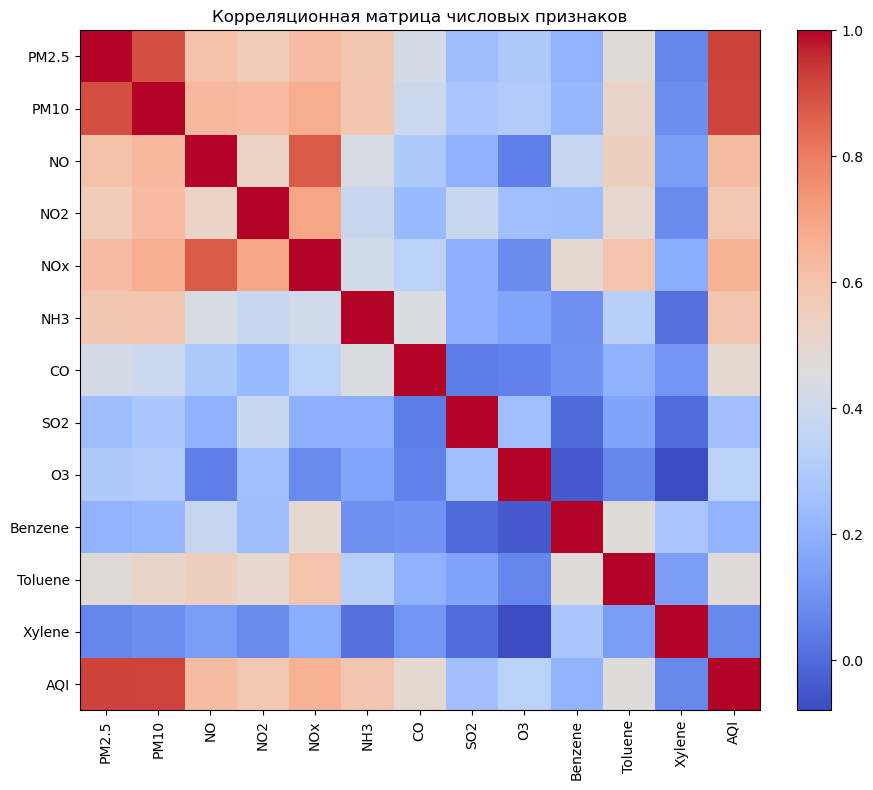

In [13]:
import numpy as np

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols)
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()
